<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EB%A8%B8%EC%99%84_ch9_6_8_591p_~_624p_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 완벽가이드 ch9.6-8 591p ~ 624p 필사

## 6. 아이템 기반 최근접 이웃 협업 필터링 실습

사용자-영화 평점 행렬 데이터 셋 이용

- 데이터 가공 및 변환

In [11]:
import pandas as pd
import numpy as np

movies = pd.read_csv('/movies.csv')
ratings = pd.read_csv('/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


- moview : title, genres

- ratings : 사용자별 영화에 대한 평점 : userid, movieid, rating -> 사용자를 로우, 영화를 칼럼으로 변경

In [12]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# title 칼럼을 얻기 위해 movies와 조인
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title'로 title 칼럼으로 피벗 수행
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

# NaN 값을 모두 0으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- 영화 간 유사도 산출

코사인 유사도 기반 : 사용자간 유사도(행 기준) -> 영화간으로 하려면 행과 열 위치 변경

In [14]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#코사인 유사도
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity()로 반환된 넘파이 행렬을 영화명을 매핑해 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns, columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [16]:
#대부와 유사도 높은 상위 6개 영화 추출
item_sim_df["Godfather, The (1972)"].sort_values(ascending=False)[:6]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [17]:
#인셉션과 유사도 높은 영화 (자신 제외)
item_sim_df["Inception (2010)"].sort_values(ascending=False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

- 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천

개인화된 영화 추천 : 개인이 아직 관람하지 않은 영화 추천 - 기존 데이터 기반 새 모든 영화 예측 평점 계산후 높은 거 추천

아이템 기반의 협업 필터리에서 개인화된 예측 평점

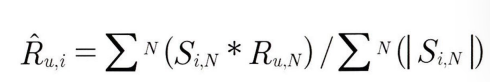

R^ : 사용자, 아이템의 개인화된 예측 평점 값

S : 아이템과 유사도 높은 아이템의 유사도 벡터

R : 사용자의 아이템과 가장 유사도 높은 아이템에 대한 실제 평점 벡터

N : 아이템 최근접 이웃 범위 계수

코사인 유사도를 벡터 내접곱한 값을 정규화를 위해 나눈 것

In [18]:
def predict_rating(ratings_arr, item_sim_arr):
    ratings_pred = ratings_arr.dot(item_sim_arr) / np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [21]:
#개인화된 예측 평점 구하기
ratings_pred=predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix=pd.DataFrame(data=ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [22]:
from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 mse를 구함
def get_mse(pred, actual):
    # 평점이 있는 실제 영화만 추출
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 최근접 이웃 mse : ', get_mse(ratings_pred, ratings_matrix.values))

아이템 기반 모든 최근접 이웃 mse :  9.895354759094706


In [23]:
#mse 감소시키는 방향으로 개선 -> 많은 영화 유사도 벡터 이용해 평점 예측 떨어짐
#-> 특정 영화와 가장 비슷한 유사도 가진 영화 가지는 영화에 대해서만 적용

def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 열 크기만큼 루프 수행.
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n - 1:-1]]
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))
    return pred


In [24]:
#예측 평점 계산, 실제 평점과의 mse 구하기
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values, n=20)
print('아이템 기반 최근접 top20 이웃 mse : ', get_mse(ratings_pred, ratings_matrix.values))

# 계산된 예측 평점 데이터는 dataframe으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)

<ipython-input-23-011ca5292329>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)


아이템 기반 최근접 top20 이웃 mse :  3.6949827608772314


In [25]:
#mse 작아짐 -> 성능 향상, 특정 사용자에 대한 영화 추천해보기
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

In [27]:
# 사용자가 이미 평점 준 영화 제외 추천할 수 있도록 평점 주지 않은 영화 리스트 객체로반환하는 함수
def get_unseen_movie(ratings_matrix, userId):
  # userid로 입력받은 사용자의 모든 영화 정보 추출해 series로 반환함
  # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임
  user_rating = ratings_matrix.loc[userId, :]

  # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출해 list 객체로 만듦
  already_seen = user_rating[user_rating > 0].index.tolist()

  # 모든 영화명을 list 객체로 만듦
  movies_list = ratings_matrix.columns.tolist()

  # list comprehension으로 already_seen에 해당하는 영화는 movies_list에서 제외함
  unseen_list = [movie for movie in movies_list if movie not in already_seen]

  return unseen_list


In [28]:
# 예측 평점 df와 추천하려는 사용자 id, 추천후보 영화 리스트, 추천 상위 영화 개수 인자로 받아서 사용자가 가장 좋아할만한 높은 예측 평점 가진 영화 추천

def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
  # 예측 평점 DataFrame에서 사용자 id 인덱스와 unseen_list로 들어온 영화명 칼럼을 추출해
  # 가장 예측 평점이 높은 순으로 정렬함
  recomm_movie = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
  return recomm_movie

# 사용자가 관람하지 않는 영화명 추출
unseen_list = get_unseen_movie(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이터를 dataframe으로 생성
recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index, columns=['pred_score'])

recomm_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


## 7. 행렬 분해를 이용한 잠재 요인 협업 필터링 실습

svd, nmf

sgd나 als 기반 행렬 분해 이용

In [29]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
  num_users, num_items = R.shape
  # P와 Q 매트릭스의 크기를 지정하고 정규 분포를 가진 랜덤한 값으로 입력합니다.
  np.random.seed(1)
  P = np.random.normal(scale=1./K, size=(num_users, K))
  Q = np.random.normal(scale=1./K, size=(num_items, K))

  prev_rmse = 10000
  break_count = 0

  # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장
  non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0]

  # SGD기반으로 P와 Q 매트릭스를 계속 업데이트
  for step in range(steps):
    for i, j, r in non_zeros:
      # 실제 값과 예측 값의 차이인 오류값 구함
      eij = r - np.dot(P[i, :], Q[j, :].T)
      # Regularization을 반영한 sgd 업데이트 공식 적용
      P[i, :] += learning_rate * (eij * Q[j, :] - r_lambda * P[i, :])
      Q[j, :] += learning_rate * (eij * P[i, :] - r_lambda * Q[j, :])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 10) == 0 :
      print("### iteration step : ", step, " rmse : ", rmse)

  return  P,Q

In [35]:
def get_rmse(R, P, Q, non_zeros):
  error = 0
  full_pred_matrix = np.dot(P, Q.T)

  x_non_zeros = [non_zero[0] for non_zero in non_zeros]
  y_non_zeros = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = [non_zero[2] for non_zero in non_zeros]

  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zeros, y_non_zeros]
  R_non_zeros = np.array(R_non_zeros)

  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [36]:
import pandas as pd
import numpy as np

movies = pd.read_csv('/movies.csv')
ratings = pd.read_csv('/ratings.csv')
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
# title 칼럼을 얻기 위해 moview와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')
# columns='title'로 title 칼럼으로 pivot 수행
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

In [37]:
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda=0.01)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  2.9023619751336867
### iteration step :  10  rmse :  0.7335768591017927
### iteration step :  20  rmse :  0.5115539026853442
### iteration step :  30  rmse :  0.37261628282537446
### iteration step :  40  rmse :  0.2960818299181014
### iteration step :  50  rmse :  0.2520353192341642
### iteration step :  60  rmse :  0.22487503275269854
### iteration step :  70  rmse :  0.2068545530233154
### iteration step :  80  rmse :  0.19413418783028685
### iteration step :  90  rmse :  0.18470082002720406
### iteration step :  100  rmse :  0.17742927527209104
### iteration step :  110  rmse :  0.1716522696470749
### iteration step :  120  rmse :  0.16695181946871726
### iteration step :  130  rmse :  0.16305292191997542
### iteration step :  140  rmse :  0.15976691929679646
### iteration step :  150  rmse :  0.1569598699945732
### iteration step :  160  rmse :  0.15453398186715425
### iteration step :  170  rmse :  0.15241618551077643
### iteration step :  180  rm

In [38]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index=ratings_matrix.index, columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


In [39]:
# 사용자가 관람하지 않은 영화명 추출
unseen_list = get_unseen_movie(ratings_matrix, 9)

# 잠재 요인 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이터를 dataframe으로 생성
recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index, columns=['pred_score'])
recomm_movies

,pred_score
title,
Rear Window (1954),5.704612
"South Park: Bigger, Longer and Uncut (1999)",5.451100
Rounders (1998),5.298393
Blade Runner (1982),5.244951
Roger & Me (1989),5.191962
Gattaca (1997),5.183179
Ben-Hur (1959),5.130463
Rosencrantz and Guildenstern Are Dead (1990),5.087375
"Big Lebowski, The (1998)",5.038690


## 8. 파이썬 추천 시스템 패키지 - surprise

surprise 패키지 소개

파이썬 기반 추천 시스템 구축을 위한 전용 패키지

In [40]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162996 sha256=28eed36b340b77cc23f5f83ab4a6631fea91630ffc1b9523a8910e052b5b727e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [42]:
#surprise를 이용한 추천 시스템 구축
from surprise import SVD, Dataset, accuracy
from surprise.model_selection import train_test_split

In [45]:
data = Dataset.load_builtin('ml-100k')
# 수행시마다 동일하게 데이터를 분할하기 위해 random_state 값 부여
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [46]:
algo = SVD()
algo.fit(trainset)

In [47]:
# 학습된 추천 알고리즘 기반 테스트 데이터 셋에 대한 추천 수행
predictions = algo.test(testset)
print('prediction type : ', type(predictions), ' size : ', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type :  <class 'list'>  size :  25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.691991813467798, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.705707305506705, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.054191985450693, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.4039506443621894, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.2251276456948292, details={'was_impossible': False})]

In [48]:
[(pred.uid, pred.iid, pred.est) for pred in predictions[:3]]

[('120', '282', 3.691991813467798),
 ('882', '291', 3.705707305506705),
 ('535', '507', 4.054191985450693)]

In [49]:
#predict() 이용해 추천 예측
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야함
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.14   {'was_impossible': False}


In [50]:
accuracy.rmse(predictions)

RMSE: 0.9492


0.9491839577460947

- surprise 주요 모듈 소개

dataset : surprise -> user_id, item_id, rating

- os 파일 데이터를 surprise 데이터 세트로 로딩


In [51]:
import pandas as pd

ratings=pd.read_csv('/ratings.csv')
#ratings_noh.csv 파일로 업로드 시 인덱스와 헤더를 모두 제거한 새로운 파일 생성
ratings.to_csv('/ratings_noh.csv', index=False, header=False)

In [53]:
from surprise import Reader

reader = Reader(line_format = 'user item rating timestamp', sep=',', rating_scale=(0.5,5))
data = Dataset.load_from_file('/ratings_noh.csv', reader=reader)

reader 클래스 주요 생성 파라미터 : line_format, sep, rating_scale

-> svd 행렬분해 기법 이용해 추천 예측

In [54]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행시마다 동일한 결과를 도출하기 위해 random_state 설정
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습 후 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

- 판다스 dataframe에서 surprise 데이터 세트로 로딩

칼럼 순서 지켜야함

In [55]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame 에서 칼럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

- surprise 추천 알고리즘 클래스

svd, knnbasic, baselineonly

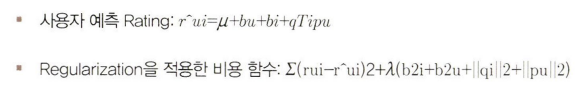

svd 입력 파라미터: n_factors, n_epochs, biased(bool)


- 베이스 라인 평점 : 개인의 성향을 반영해 아이템 평가에 편향성 요소를 반영하여 평점을 부과하는 것 : 전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수 공식

1. 전체 평균 평점 = 모든 사용자 아이템에 대한 평점 평균한 값

2. 사용자 편향 점수 = 사용자별 아이템 평점 평균 값 - 전체 평균 평점

3. 아이템 편향 점수 = 아이템별 평점 평균 값 - 전체 평균 평점

- 교차 검증과 하이퍼 파라미터 튜닝

croos_validate()

In [56]:
from surprise.model_selection import cross_validate

# 판다스 dataframe에서 surprise 데이터 세트로 데이터 로딩
ratings = pd.read_csv('/ratings.csv') # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8724  0.8729  0.8735  0.8726  0.8834  0.8750  0.0042  
MAE (testset)     0.6709  0.6706  0.6680  0.6725  0.6800  0.6724  0.0041  
Fit time          1.76    1.64    3.14    3.06    2.59    2.44    0.63    
Test time         0.33    0.13    0.22    0.52    0.15    0.27    0.14    


{'test_rmse': array([0.8724035 , 0.87288946, 0.87345643, 0.87262857, 0.88337819]),
 'test_mae': array([0.67085041, 0.67056714, 0.66798929, 0.67254846, 0.6800387 ]),
 'fit_time': (1.7640531063079834,
  1.635655164718628,
  3.137204647064209,
  3.0640690326690674,
  2.5929386615753174),
 'test_time': (0.3280632495880127,
  0.1290285587310791,
  0.22361302375793457,
  0.5248050689697266,
  0.15211939811706543)}

In [58]:
from surprise.model_selection import GridSearchCV

#최적화할 파라미터를 딕셔너리 형태로 지정
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50,100,200]}

#CV를 3개 폴드 세트로 지정, 성능 평가는 RMSE, MSE로 수행하도록 GridsearchCV로 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

#최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8783763629335608
{'n_epochs': 20, 'n_factors': 50}


- surprise를 이용한 개인화 영화 추천 시스템 구축 : 특정 사용자가 아직 평점 매기지 않은 영화중 개인 취향에 가장 적절한 영화 추천

In [60]:
# 다음 코드는 train_test_split()으로 분리되지 않는 데이터셋에 fit()을 호출해 오류가 발생합니다
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
algo = SVD(n_factors=50, random_state=0)
algo.fit(data)

AttributeError: 'DatasetAutoFolds' object has no attribute 'n_users'

In [61]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratins_noh.csv 파일 기반으로 생성
data_folds = DatasetAutoFolds(ratings_file='/ratings_noh.csv', reader=reader)

#전체 데이터를 학습데이터로 생성
trainset = data_folds.build_full_trainset()

In [62]:
algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)

In [63]:
#특정 사용자 : userid=9
#영화에 대한 상세 속성 정보 dataframe 로딩
movies = pd.read_csv('/movies.csv')

#userId=9의 movieId 데이터를 추출해 movieId=42 데이터가 있는지 확인
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [64]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


In [66]:
# 추천 예측 평점 est 값으로 3.13

# 사용자가 평점 매기지 않은 전체 영화 추출후 예측 평점 순 영화 추천

def get_unseen_surprise(ratings, movies, userId):
    # 입력값으로 들어온 userid에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()

    # 모든 영화의 movieid를 리스트로 생성
    total_movies = movies['movieId'].tolist()

    # 모든 영화의 movieid 중 이미 평점을 매긴 영화의 movieid를 제외한 후 리스트로 생성
    unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), \
          '전체 영화수:',len(total_movies))

    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742


In [72]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]

    def sortkey_est(pred):
        return pred.est

    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions = predictions[:top_n]

    top_movie_ids = [int(pred.iid) for pred in top_predictions]
    top_movie_rating = [pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']

    top_movie_preds = [(id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

print('#### top 10 추천 영화 리스트 ####')
for top_movie in top_movie_preds:
    print(top_movie[1], ':', top_movie[2])


평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742
#### top 10 추천 영화 리스트 ####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122657
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957
